# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 15s 36ms/step - loss: 0.6366 - accuracy: 0.8087 - val_loss: 0.2744 - val_accuracy: 0.9184
Epoch 2/10
375/375 [==============================] - 8s 21ms/step - loss: 0.2547 - accuracy: 0.9206 - val_loss: 0.2102 - val_accuracy: 0.9365
Epoch 3/10
375/375 [==============================] - 8s 22ms/step - loss: 0.1609 - accuracy: 0.9508 - val_loss: 0.2037 - val_accuracy: 0.9371
Epoch 4/10
375/375 [==============================] - 8s 21ms/step - loss: 0.1155 - accuracy: 0.9641 - val_loss: 0.1429 - val_accuracy: 0.9580
Epoch 5/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0835 - accuracy: 0.9736 - val_loss: 0.1629 - val_accuracy: 0.9524
Epoch 6/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0634 - accuracy: 0.9800 - val_loss: 0.1428 - val_accuracy: 0.9610
Epoch 7/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0457 - accuracy: 0.9850 - val_loss: 0.1168 - val_accuracy: 0.967

**Plotting a validation accuracy comparison**

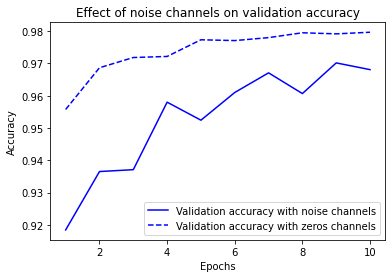

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 12ms/step - loss: 2.3151 - accuracy: 0.1032 - val_loss: 2.3044 - val_accuracy: 0.1091
Epoch 2/100
375/375 [==============================] - 5s 12ms/step - loss: 2.3005 - accuracy: 0.1158 - val_loss: 2.3110 - val_accuracy: 0.1032
Epoch 3/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2907 - accuracy: 0.1249 - val_loss: 2.3131 - val_accuracy: 0.1081
Epoch 4/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2771 - accuracy: 0.1415 - val_loss: 2.3243 - val_accuracy: 0.1063
Epoch 5/100
375/375 [==============================] - 4s 12ms/step - loss: 2.2594 - accuracy: 0.1540 - val_loss: 2.3367 - val_accuracy: 0.1041
Epoch 6/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2378 - accuracy: 0.1701 - val_loss: 2.3498 - val_accuracy: 0.1080
Epoch 7/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2130 - accuracy: 0.1851 - val_loss: 2.3702 - val_accuracy:

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 14ms/step - loss: 1018.8551 - accuracy: 0.3508 - val_loss: 2.0268 - val_accuracy: 0.2747
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 4.9834 - accuracy: 0.2305 - val_loss: 3.7697 - val_accuracy: 0.2794
Epoch 3/10
375/375 [==============================] - 5s 12ms/step - loss: 4.0885 - accuracy: 0.2299 - val_loss: 2.5127 - val_accuracy: 0.2450
Epoch 4/10
375/375 [==============================] - 6s 15ms/step - loss: 2.7417 - accuracy: 0.2233 - val_loss: 2.3191 - val_accuracy: 0.2085
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 2.4913 - accuracy: 0.2268 - val_loss: 2.1107 - val_accuracy: 0.2127
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 2.8273 - accuracy: 0.2246 - val_loss: 2.2572 - val_accuracy: 0.2757
Epoch 7/10
375/375 [==============================] - 5s 12ms/step - loss: 2.5052 - accuracy: 0.2539 - val_loss: 2.7124 - val_accuracy: 0.2

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.3572 - accuracy: 0.9129 - val_loss: 0.1738 - val_accuracy: 0.9529
Epoch 2/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1409 - accuracy: 0.9629 - val_loss: 0.1509 - val_accuracy: 0.9631
Epoch 3/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1145 - accuracy: 0.9732 - val_loss: 0.1956 - val_accuracy: 0.9657
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1020 - accuracy: 0.9778 - val_loss: 0.2246 - val_accuracy: 0.9665
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0866 - accuracy: 0.9820 - val_loss: 0.2075 - val_accuracy: 0.9733
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0810 - accuracy: 0.9835 - val_loss: 0.2110 - val_accuracy: 0.9718
Epoch 7/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0793 - accuracy: 0.9854 - val_loss: 0.2566 - val_accuracy: 0.9728

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6797 - accuracy: 0.8308 - val_loss: 0.3598 - val_accuracy: 0.9034
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3520 - accuracy: 0.9029 - val_loss: 0.3081 - val_accuracy: 0.9157
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3161 - accuracy: 0.9126 - val_loss: 0.2910 - val_accuracy: 0.9187
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2995 - accuracy: 0.9168 - val_loss: 0.2820 - val_accuracy: 0.9213
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2900 - accuracy: 0.9197 - val_loss: 0.2772 - val_accuracy: 0.9228
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2833 - accuracy: 0.9209 - val_loss: 0.2722 - val_accuracy: 0.9243
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2782 - accuracy: 0.9221 - val_loss: 0.2691 - val_accuracy: 0.9262
Epoch 

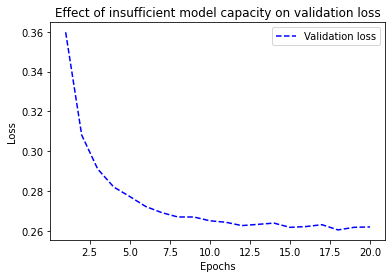

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3658 - accuracy: 0.8947 - val_loss: 0.1933 - val_accuracy: 0.9436
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1650 - accuracy: 0.9518 - val_loss: 0.1453 - val_accuracy: 0.9568
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1147 - accuracy: 0.9657 - val_loss: 0.1149 - val_accuracy: 0.9667
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0871 - accuracy: 0.9739 - val_loss: 0.1024 - val_accuracy: 0.9698
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0707 - accuracy: 0.9785 - val_loss: 0.0991 - val_accuracy: 0.9709
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0568 - accuracy: 0.9828 - val_loss: 0.0991 - val_accuracy: 0.9714
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0479 - accuracy: 0.9852 - val_loss: 0.0970 - val_accuracy: 0.9733
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 83ms/step - loss: 0.4988 - accuracy: 0.7973 - val_loss: 0.3930 - val_accuracy: 0.8477
Epoch 2/20
30/30 [==============================] - 2s 67ms/step - loss: 0.2958 - accuracy: 0.9014 - val_loss: 0.2987 - val_accuracy: 0.8879
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2146 - accuracy: 0.9289 - val_loss: 0.2755 - val_accuracy: 0.8921
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1736 - accuracy: 0.9425 - val_loss: 0.2853 - val_accuracy: 0.8849
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1397 - accuracy: 0.9555 - val_loss: 0.3375 - val_accuracy: 0.8671
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1177 - accuracy: 0.9637 - val_loss: 0.2980 - val_accuracy: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0976 - accurac

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5893 - accuracy: 0.7337 - val_loss: 0.4842 - val_accuracy: 0.8442
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4108 - accuracy: 0.8822 - val_loss: 0.3798 - val_accuracy: 0.8728
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3139 - accuracy: 0.9105 - val_loss: 0.3269 - val_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2530 - accuracy: 0.9285 - val_loss: 0.2986 - val_accuracy: 0.8905
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2124 - accuracy: 0.9381 - val_loss: 0.2828 - val_accuracy: 0.8901
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1822 - accuracy: 0.9461 - val_loss: 0.2764 - val_accuracy: 0.8906
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1597 - accuracy: 0.9529 - val_loss: 0.2774 - val_accuracy: 0.8897
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 10s 317ms/step - loss: 0.5378 - accuracy: 0.7527 - val_loss: 0.3212 - val_accuracy: 0.8843
Epoch 2/20
30/30 [==============================] - 9s 304ms/step - loss: 0.2428 - accuracy: 0.9055 - val_loss: 0.2665 - val_accuracy: 0.8912
Epoch 3/20
30/30 [==============================] - 9s 304ms/step - loss: 0.1435 - accuracy: 0.9460 - val_loss: 0.2855 - val_accuracy: 0.8914
Epoch 4/20
30/30 [==============================] - 9s 307ms/step - loss: 0.0831 - accuracy: 0.9716 - val_loss: 0.3605 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 9s 305ms/step - loss: 0.1337 - accuracy: 0.9757 - val_loss: 0.3386 - val_accuracy: 0.8899
Epoch 6/20
30/30 [==============================] - 9s 306ms/step - loss: 0.0053 - accuracy: 0.9996 - val_loss: 0.4771 - val_accuracy: 0.8900
Epoch 7/20
30/30 [==============================] - 9s 304ms/step - loss: 9.4005e-04 - accuracy: 1.0000 - val_loss: 0.6139 - val_accuracy: 0.8866
E

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.5976 - accuracy: 0.7779 - val_loss: 0.4736 - val_accuracy: 0.8670
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4043 - accuracy: 0.8946 - val_loss: 0.4097 - val_accuracy: 0.8709
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3333 - accuracy: 0.9173 - val_loss: 0.3690 - val_accuracy: 0.8852
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3055 - accuracy: 0.9229 - val_loss: 0.3576 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2798 - accuracy: 0.9332 - val_loss: 0.3750 - val_accuracy: 0.8754
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2655 - accuracy: 0.9380 - val_loss: 0.3634 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2599 - accuracy: 0.9364 - val_loss: 0.3579 - val_accuracy: 0.8858
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 52ms/step - loss: 0.6289 - accuracy: 0.6411 - val_loss: 0.5117 - val_accuracy: 0.8501
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4990 - accuracy: 0.7802 - val_loss: 0.3953 - val_accuracy: 0.8657
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4153 - accuracy: 0.8311 - val_loss: 0.3340 - val_accuracy: 0.8795
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3524 - accuracy: 0.8690 - val_loss: 0.3000 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3011 - accuracy: 0.8954 - val_loss: 0.2796 - val_accuracy: 0.8924
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2654 - accuracy: 0.9044 - val_loss: 0.2781 - val_accuracy: 0.8926
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2306 - accuracy: 0.9193 - val_loss: 0.2831 - val_accuracy: 0.8923
Epoch 8/20
30